In [1]:
import numpy as np

import matplotlib.pyplot as plt

## Generate some data

In [37]:
X_size = (50, 1)
X = np.random.randint(1, 100, X_size)
y = 3 + 2 * X

In [38]:
y_b = 3 + 2 * X + np.random.randn(X_size[0], X_size[1])

### Visualize the original data

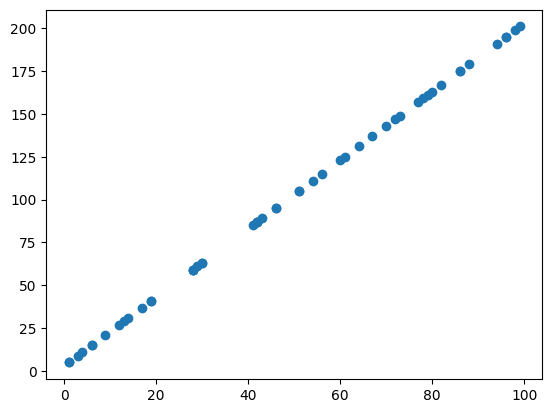

In [4]:
plt.scatter(X, y)

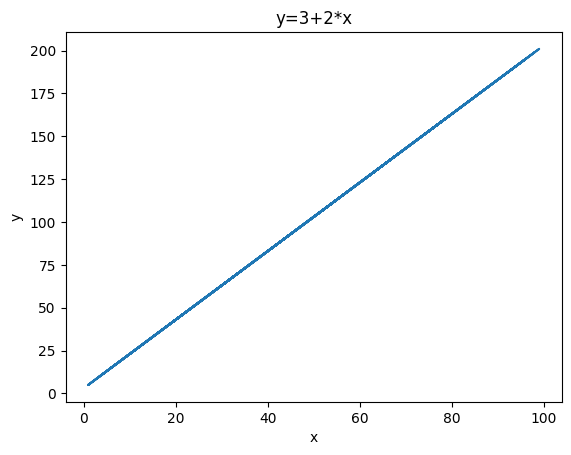

In [5]:
plt.plot(X, y)
plt.title("y=3+2*x")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

### Visualize the data with Gaussian noise

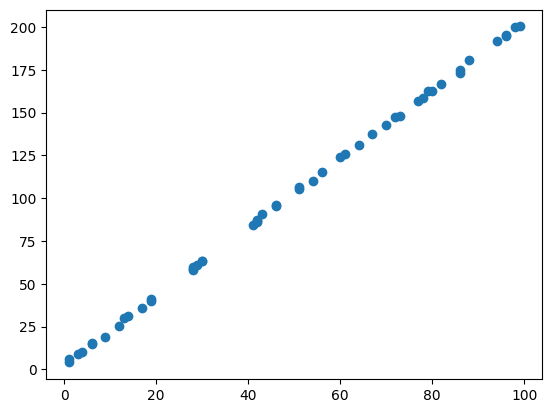

In [6]:
plt.scatter(X, y_b)

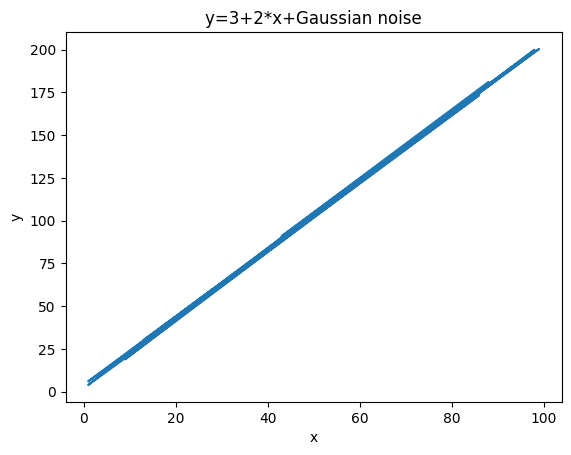

In [11]:
plt.plot(X, y_b)
plt.title("y=3+2*x+Gaussian noise")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

## The Normal Equation

$$
    \hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y 
$$
In this equation
- $ \hat{\theta} $ is the value of $ \theta $ that minimizes the cost function;
- $ y $ is the vector of target values containing $ y^{(1)} $ to $ y^{(m)} $

In [39]:
X_b = np.c_[np.ones(X_size), X] # add x0 = 1 to each instance

In [40]:
theta_coefs = np.linalg.inv(np.dot(X_b.T, X_b)).dot(X_b.T).dot(y)
theta_coefs

array([[3.],
       [2.]])

**If we use as y the results of a linear function (without additional noise), then the linear regression equation coincides with the original one**

#### Calculate coeficients

In [41]:
theta_coefs = np.linalg.inv(np.dot(X_b.T, X_b)).dot(X_b.T).dot(y_b)
theta_coefs

array([[2.8000606 ],
       [2.00476733]])

**If the data contains noise, then the linear regression coefficients will be close to the original ones, but the noise made it impossible to recover the exact parameters of the original function**

## Make predictions

In [42]:
X_test = np.array([[1], [50], [100]])
X_test_b = np.c_[np.ones((3, 1)), X_test]
X_test_b

array([[  1.,   1.],
       [  1.,  50.],
       [  1., 100.]])

In [43]:
y_predict = np.dot(X_test_b, theta_coefs)
y_predict

array([[  4.80482793],
       [103.03842708],
       [203.27679355]])

### Plot models predictions

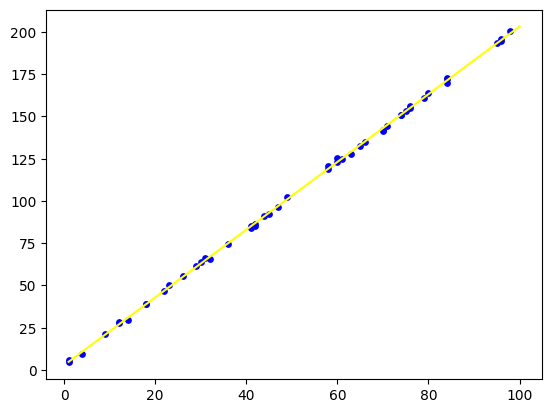

In [49]:
plt.scatter(X, y_b, color='blue', s=15)
plt.plot(X_test, y_predict, color='yellow')